ROLL NO : CH.SC.U4CSE23225

Part 3: Principal Component Analysis (PCA)
3.1 PCA Example from Lab Manual (Breast Cancer Dataset)

First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  wo

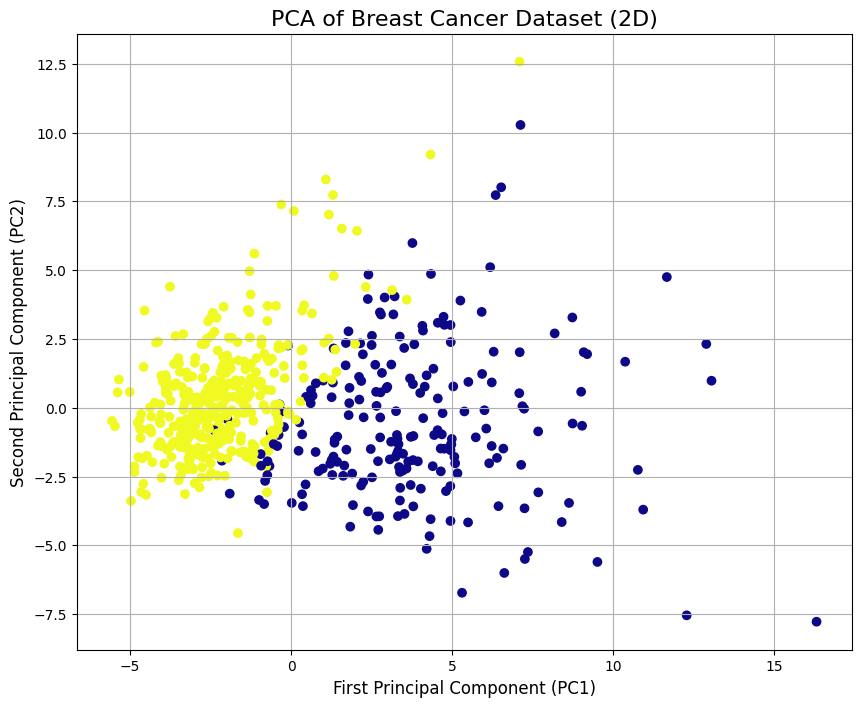

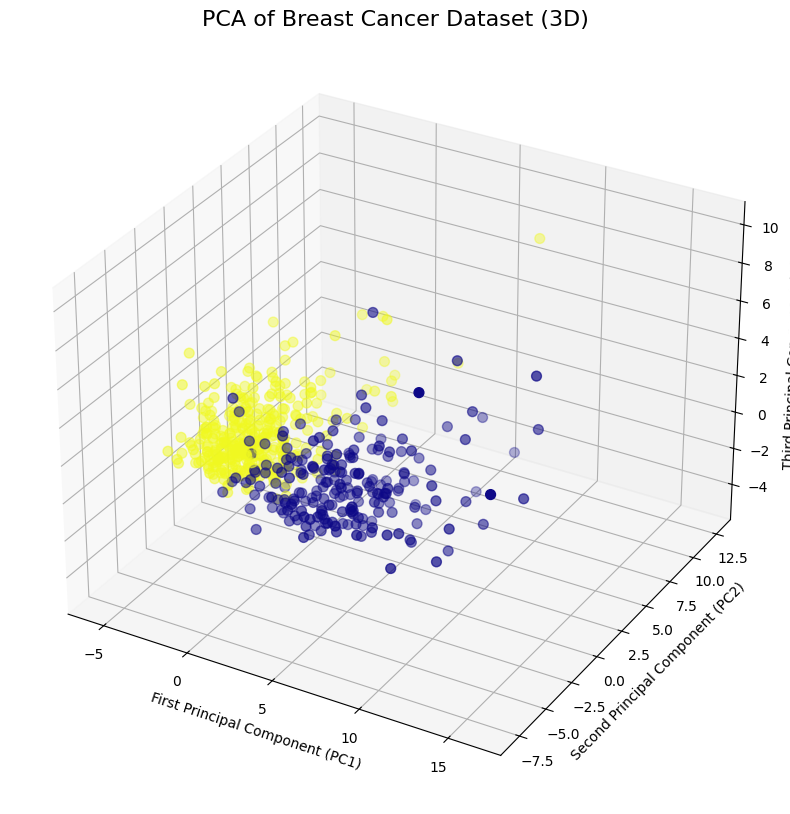


Explained variance by each principal component:
PC1: 0.4427 (44.27%)
PC2: 0.1897 (18.97%)
PC3: 0.0939 (9.39%)
Total Explained Variance (PC1+PC2+PC3): 0.7264 (72.64%)


In [1]:
# Cell 1: PCA Example from Lab Manual

# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

# Step 2: Load the Dataset
cancer_data = load_breast_cancer()

# Explore the dataset's structure
# print(cancer_data.keys())

# Step 3: Create a Pandas DataFrame
# The data contains the features, and feature_names are the column headers.
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
print("First 5 rows of the dataset:")
print(df.head())
print(f"\nOriginal dataset shape: {df.shape}")

# Step 4: Standardize the Data
# PCA is sensitive to the scale of the features, so standardization is a crucial step.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Apply PCA
# The manual's code uses n_components=3, which allows for both 2D and 3D visualization.
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
print(f"\nShape of data after PCA: {pca_df.shape}")

# Step 6: Visualize the Principal Components

# --- 2D Visualization ---
plt.figure(figsize=(10, 8))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=cancer_data['target'], # Color by the target class (malignant/benign)
    cmap='plasma'
)
plt.title('PCA of Breast Cancer Dataset (2D)', fontsize=16)
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.grid(True)
plt.show()

# --- 3D Visualization ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=cancer_data['target'],
    cmap='plasma',
    s=50 # marker size
)
ax.set_title('PCA of Breast Cancer Dataset (3D)', fontsize=16)
ax.set_xlabel('First Principal Component (PC1)')
ax.set_ylabel('Second Principal Component (PC2)')
ax.set_zlabel('Third Principal Component (PC3)')
plt.show()

# Step 7: Explained Variance
# This tells us how much of the original data's variance is captured by each principal component.
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance by each principal component:")
print(f"PC1: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"PC2: {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")
print(f"PC3: {explained_variance[2]:.4f} ({explained_variance[2]*100:.2f}%)")
print(f"Total Explained Variance (PC1+PC2+PC3): {sum(explained_variance):.4f} ({sum(explained_variance)*100:.2f}%)")

3.2 PCA Exercises (Exercise 11.4)

Objective: The problem asks for "insights" into why properties aren't selling. We can use PCA to reduce the many features of a real estate dataset into two principal components and visualize them. This helps identify the main sources of variation in the property market (e.g., location vs. size/age) and can reveal clusters or outliers. We will use the standard California Housing dataset from sklearn for this demonstration.

California Housing Dataset features:
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

--- Insights for Maggie ---
Maggie, this plot visualizes all your properties based on their two most important underlying factors.
The First Principal Component (PC1) seems to represent economic and location factors (like median income and proximity to the ocean). Properties move from left to right as these factors increase.
The Second Principal Component (PC2) appears related to the house structure itself (like age and number of rooms).

By looking at the colors, you can see how these factors relate to price (Median House Value):
- High-value properties (yellow) are clustered on the right side, indicating strong economic/location factors are key.
- You can use this chart to identify properties that are outliers or fall into specific market segments, helping you tailor your sales strategy.


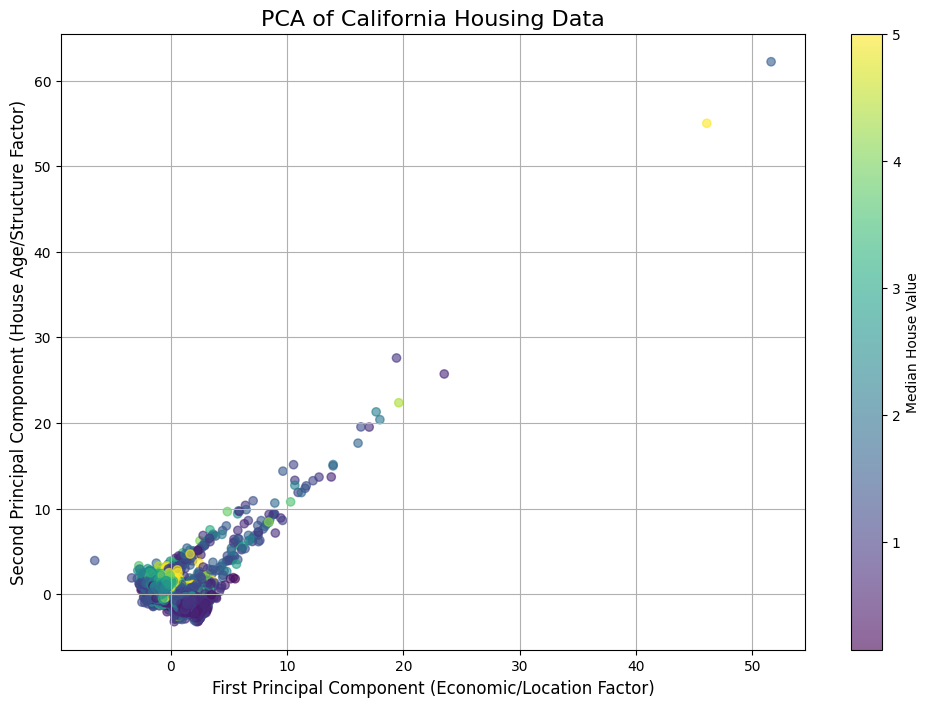

In [2]:
# Cell 2: Exercise 11.4.1 - Real Estate Insights

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load a suitable dataset
# The California Housing dataset is a good choice for this real estate problem.
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target variable (median house value) for coloring the plot
df_housing['MedHouseVal'] = housing.target

print("California Housing Dataset features:")
print(df_housing.columns)

# Step 2: Standardize the features
features = housing.feature_names
X = df_housing[features].values
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
principal_components_housing = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pca_housing_df = pd.DataFrame(data=principal_components_housing, columns=['PC1', 'PC2'])
pca_housing_df['MedHouseVal'] = df_housing['MedHouseVal']

# Step 4: Visualize and provide insights
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pca_housing_df['PC1'],
    pca_housing_df['PC2'],
    c=pca_housing_df['MedHouseVal'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Median House Value')
plt.title('PCA of California Housing Data', fontsize=16)
plt.xlabel('First Principal Component (Economic/Location Factor)', fontsize=12)
plt.ylabel('Second Principal Component (House Age/Structure Factor)', fontsize=12)
plt.grid(True)

# Step 5: Explain the insights for Maggie
print("\n--- Insights for Maggie ---")
print("Maggie, this plot visualizes all your properties based on their two most important underlying factors.")
print("The First Principal Component (PC1) seems to represent economic and location factors (like median income and proximity to the ocean). Properties move from left to right as these factors increase.")
print("The Second Principal Component (PC2) appears related to the house structure itself (like age and number of rooms).")
print("\nBy looking at the colors, you can see how these factors relate to price (Median House Value):")
print("- High-value properties (yellow) are clustered on the right side, indicating strong economic/location factors are key.")
print("- You can use this chart to identify properties that are outliers or fall into specific market segments, helping you tailor your sales strategy.")

plt.show()

Objective: The question asks to "identify which variable is the principal component." This is interpreted as: "For each of the three principal components given in the table, which original variable has the strongest influence?" We can determine this by finding the variable with the highest absolute loading (coefficient) for each component.

In [3]:
# Cell 3: Exercise 11.4.2 - Identifying Most Influential Variables

import pandas as pd
import numpy as np

# Step 1: Create a DataFrame from the table provided in the exercise
data = {
    'Variable': ['Climate', 'Housing', 'Health', 'Crime', 'Transportation', 'Education', 'Arts', 'Recreation', 'Economy'],
    '1': [0.190, 0.544, 0.782, 0.365, 0.585, 0.394, 0.985, 0.520, 0.142],
    '2': [0.017, 0.020, -0.605, 0.294, 0.085, -0.273, 0.126, 0.402, 0.150],
    '3': [0.207, 0.204, 0.144, 0.585, 0.234, 0.027, -0.111, 0.519, 0.239]
}
loadings_df = pd.DataFrame(data).set_index('Variable')
loadings_df.columns = ['PC1', 'PC2', 'PC3']

print("Component Loadings Table:")
print(loadings_df)

# Step 2: Find the variable with the highest absolute loading for each principal component
# The idxmax() function returns the index (Variable name) of the maximum value in a series.
# We apply it to the absolute values of the loadings.

most_influential_pc1 = loadings_df['PC1'].abs().idxmax()
loading_pc1 = loadings_df.loc[most_influential_pc1, 'PC1']

most_influential_pc2 = loadings_df['PC2'].abs().idxmax()
loading_pc2 = loadings_df.loc[most_influential_pc2, 'PC2']

most_influential_pc3 = loadings_df['PC3'].abs().idxmax()
loading_pc3 = loadings_df.loc[most_influential_pc3, 'PC3']

# Step 3: Print the results clearly
print("\n--- Most Influential Variable for Each Principal Component ---")
print(f"For PC1, the principal variable is '{most_influential_pc1}' with a loading of {loading_pc1:.3f}.")
print(f"For PC2, the principal variable is '{most_influential_pc2}' with a loading of {loading_pc2:.3f}.")
print(f"For PC3, the principal variable is '{most_influential_pc3}' with a loading of {loading_pc3:.3f}.")

Component Loadings Table:
                  PC1    PC2    PC3
Variable                           
Climate         0.190  0.017  0.207
Housing         0.544  0.020  0.204
Health          0.782 -0.605  0.144
Crime           0.365  0.294  0.585
Transportation  0.585  0.085  0.234
Education       0.394 -0.273  0.027
Arts            0.985  0.126 -0.111
Recreation      0.520  0.402  0.519
Economy         0.142  0.150  0.239

--- Most Influential Variable for Each Principal Component ---
For PC1, the principal variable is 'Arts' with a loading of 0.985.
For PC2, the principal variable is 'Health' with a loading of -0.605.
For PC3, the principal variable is 'Crime' with a loading of 0.585.
